In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset
np.random.seed(42)  # For reproducibility
data = {
    f"revenue_m{i:02d}": np.random.normal(loc=1000, scale=200, size=100).tolist()
    for i in range(1, 5)
}

# Introduce outliers
for col in data.keys():
    outliers = np.random.choice(range(100), size=5, replace=False)
    for idx in outliers:
        data[col][idx] += np.random.randint(1000, 2000)

df = pd.DataFrame(data)

# Step 2: Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()
    for column in columns:
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
    return clean_df

# Step 3: Remove outliers
revenue_columns = df.columns
clean_df = remove_outliers_iqr(df, revenue_columns)

In [3]:
clean_df.shape

(78, 4)

In [2]:
clean_df.head()

,revenue_m01,revenue_m02,revenue_m03,revenue_m04
0,1099.342831,716.925852,1071.557472,834.200998
1,972.347140,915.870935,1112.156905,887.963792
3,1304.605971,839.544546,1210.760410,1122.074053
4,953.169325,967.742858,724.466126,995.819681
5,953.172609,1080.810171,812.434992,1023.465477


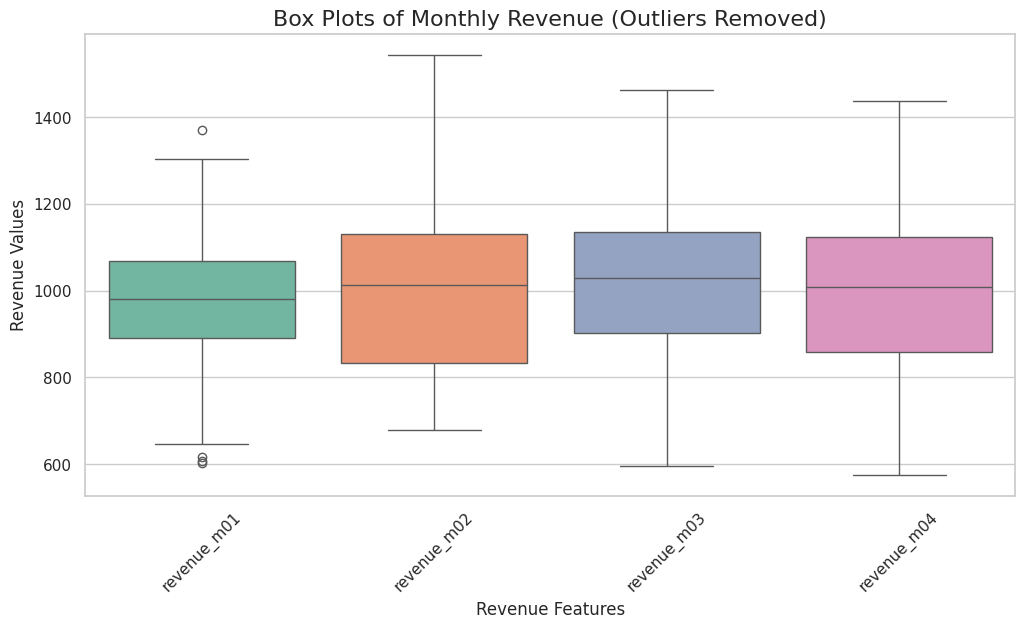

In [4]:
# Step 4: Create aesthetically pleasing box plots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(data=clean_df, palette="Set2")
plt.title("Box Plots of Monthly Revenue (Outliers Removed)", fontsize=16)
plt.xlabel("Revenue Features", fontsize=12)
plt.ylabel("Revenue Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()

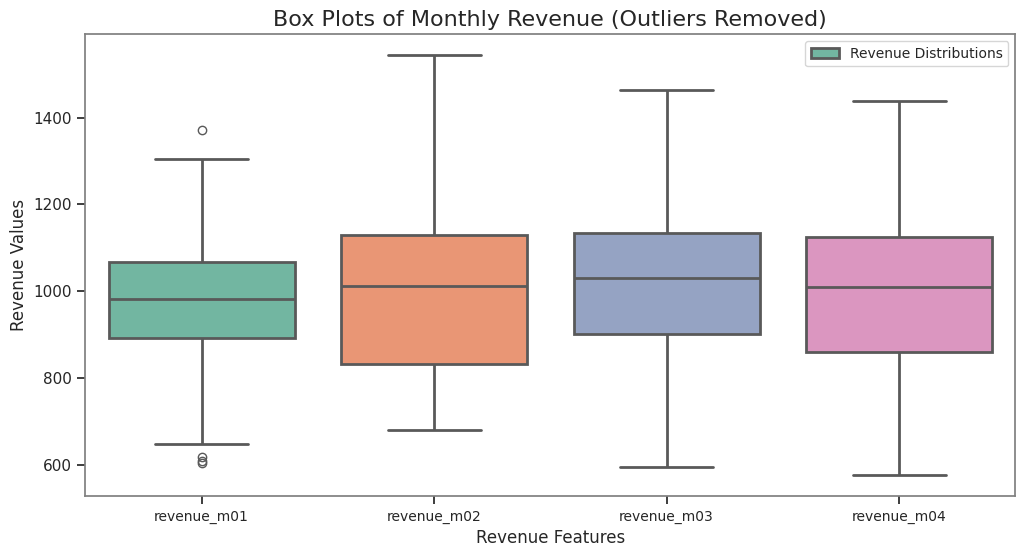

In [5]:
# Step 4: Create aesthetically pleasing box plots with requested customizations
plt.figure(figsize=(12, 6))
sns.set(style="ticks")  # Turn off gridlines
sns.boxplot(data=clean_df, palette="Set2", linewidth=2)  # Thicker outline
plt.title("Box Plots of Monthly Revenue (Outliers Removed)", fontsize=16)
plt.xlabel("Revenue Features", fontsize=12)
plt.ylabel("Revenue Values", fontsize=12)
plt.xticks(rotation=0, fontsize=10, wrap=True)  # Horizontal axis labels with wrap support
plt.gca().spines['top'].set_color('grey')  # Adding bold grey outlines
plt.gca().spines['right'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.legend(["Revenue Distributions"], loc="upper right", fontsize=10)  # Adding legend
plt.show()

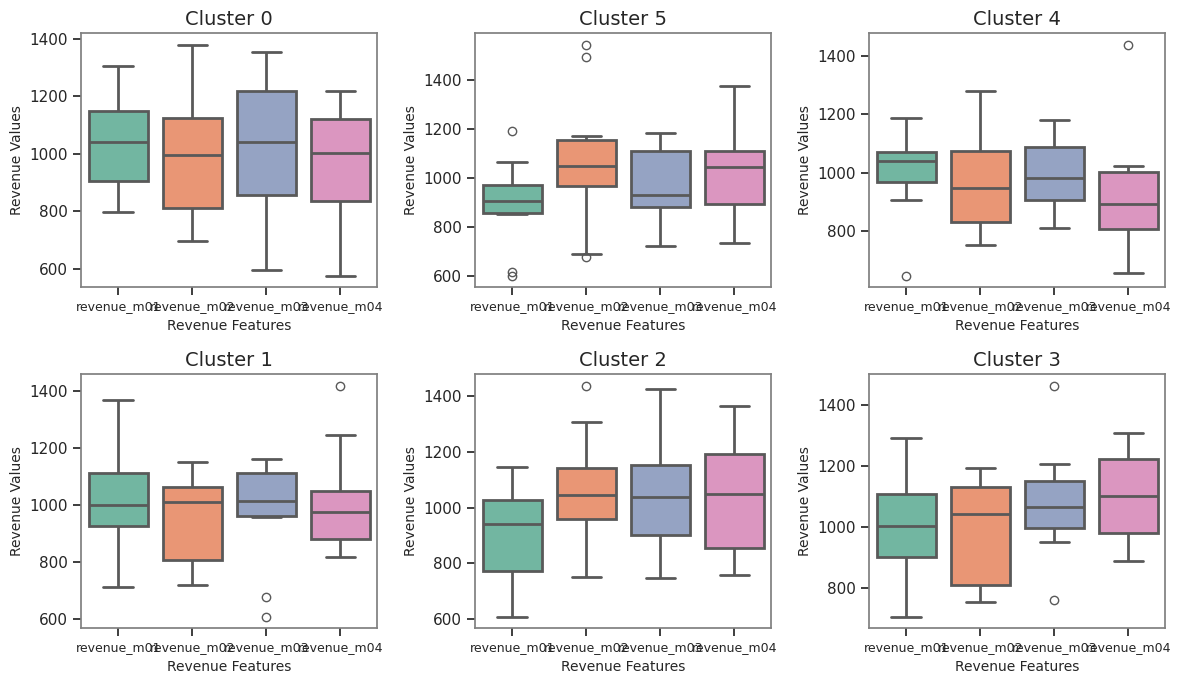

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset
np.random.seed(42)  # For reproducibility
data = {
    f"revenue_m{i:02d}": np.random.normal(loc=1000, scale=200, size=100).tolist()
    for i in range(1, 5)
}

# Introduce outliers
for col in data.keys():
    outliers = np.random.choice(range(100), size=5, replace=False)
    for idx in outliers:
        data[col][idx] += np.random.randint(1000, 2000)

# Add a cluster column (categories 0 to 5)
data["cluster"] = np.random.choice([0, 1, 2, 3, 4, 5], size=100)

df = pd.DataFrame(data)

# Step 2: Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()
    for column in columns:
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
    return clean_df

# Step 3: Remove outliers
revenue_columns = [col for col in df.columns if "revenue" in col]
clean_df = remove_outliers_iqr(df, revenue_columns)

# Step 4: Create subplots for each cluster
clusters = clean_df["cluster"].unique()
num_clusters = len(clusters)

fig, axes = plt.subplots(2, 3, figsize=(12, 7))  # Create a 2x3 grid of subplots
axes = axes.flatten()

sns.set(style="ticks")  # Turn off gridlines

for idx, cluster in enumerate(clusters):
    cluster_data = clean_df[clean_df["cluster"] == cluster]
    sns.boxplot(data=cluster_data[revenue_columns], palette="Set2", linewidth=2, ax=axes[idx])
    axes[idx].set_title(f"Cluster {cluster}", fontsize=14)
    axes[idx].set_xlabel("Revenue Features", fontsize=10)
    axes[idx].set_ylabel("Revenue Values", fontsize=10)
    axes[idx].tick_params(axis="x", labelrotation=0, labelsize=9)
    for spine in axes[idx].spines.values():
        spine.set_color('grey')  # Adding bold grey outlines

# Remove unused subplots if any
for ax in axes[num_clusters:]:
    ax.set_visible(False)

# Add a main title for the entire figure
# plt.suptitle("Box Plots for Revenue Features by Cluster", fontsize=18, y=0.95)
plt.tight_layout()
plt.show()
